# Project Name: Car Price Prediction
In this project we are going to predict car prices based on several car specification. Our target is to build a system that woulf predict the car price once the specification is entered

### Calling the primary libraries

In [1]:
import pandas as pd
import numpy as np 
import warnings

warnings.filterwarnings('ignore')

### Calling the dataset

In [2]:
# importing the car data into pandas DataFrame object
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# getting the shape of the datset
print(f'''
No. of Rows: {df.shape[0]}
No. of Columns: {df.shape[1]}
''')


No. of Rows: 301
No. of Columns: 9



In [4]:
# getting some information about the dataset
df.info()

# comments: there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# getting the distribution of values of categorical features
categorical_features = [feat for feat in df.columns if df[feat].dtype == 'object'][1:]

for feat in categorical_features:
    print(f'{feat}\n----------------------')
    print(df[feat].value_counts())

Fuel_Type
----------------------
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_Type
----------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission
----------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the categorical features

In [13]:
# encoding the Fuel_Type
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

# encoding the Seller_Type
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0,'Individual':1})

# encoding the Trasmission
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Creating X and y

In [17]:
X = df.drop(['Car_Name','Selling_Price'], axis = 1) # here we are not considering the Car_Name as a feature
y = df['Selling_Price']

### Training and Testing Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=1)

print(f'''
Shapes:
X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}
''')


Shapes:
X_train: (255, 7)
X_test: (46, 7)
y_train: (255,)
y_test: (46,)



### Model Training

In [35]:
# now we will be using the grid search cv to compare between the models like Linear regression and Lasso regression
from locale import normalize
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV

def get_model():
    scores = []
    algos = {
        'Lasso Regression':{
            'model':Lasso(), 
            'params': {
                'alpha': [0.2, 0.4, 0.6, 0.8, 1],
                'normalize': [True, False]
            }
        },
        'Linear Regression':{
            'model':LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        }
    }

    for algo, spec in algos.items():
        gscv = GridSearchCV(spec['model'], spec['params'], cv=10)
        gscv.fit(X_train, y_train)
        algo_dict = {'model': algo, 'score': gscv.best_score_, 'best params': gscv.best_params_}
        scores.append(algo_dict)

    return pd.DataFrame(scores, columns=['model', 'score', 'best params'])

scores = get_model()

scores

# comments: the linear regression is more effective here

,model,score,best params
0,Lasso Regression,0.807196,"{'alpha': 0.2, 'normalize': False}"
1,Linear Regression,0.823144,{'normalize': False}


### Prediction and evaluation


In [38]:
# let's finalize our model and predict
model = LinearRegression(**scores['best params'][1])
model.fit(X_train, y_train)

X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

In [39]:
# scores of prediction 
from sklearn.metrics import r2_score

training_data_score = round(r2_score(y_train, X_train_pred)*100,4)
testing_data_score = round(r2_score(y_test, X_test_pred)*100,4)

print(f'''
training score: {training_data_score} %
testing score: {testing_data_score} %
''')


training score: 88.2863 %
testing score: 82.2263 %



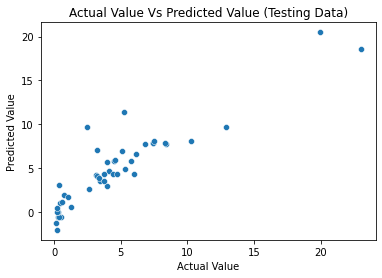

In [40]:
# let's visualise the model efficiency
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(y_test, X_test_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value (Testing Data)')
plt.show()